In [3]:
import pandas
print(pandas.__version__)
import pandas as pd

0.25.1


In [7]:
#display all the contents of the pandas namespace
pd?

# Pandas Objects

## pandas series object

In [11]:
import numpy as np
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [15]:
# change the index to the name
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data['b']

0.5

In [19]:
#Series also supports array-style operations such as slicing
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [30]:
#data can be a list or NumPy array, in which case index defaults to an integer sequence
a = pd.Series([2, 4, 6])
b = pd.Series(5, index=[100, 200, 300])
c = pd.Series({2:'a', 1:'b', 3:'c'})
print(a)
print(b)
print(c)

0    2
1    4
2    6
dtype: int64
100    5
200    5
300    5
dtype: int64
2    a
1    b
3    c
dtype: object


## dataframe obeject 

In [34]:
#use a dictionary to construct a single two-dimensional object 
area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict)

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

states = pd.DataFrame({'Population': population,
                      'area': area})
states

,Population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [37]:
#other ways to do this 1
pd.DataFrame(population, columns=['population'])

#other ways to do this in a list
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)



,a,b
0,0,0
1,1,2
2,2,4


In [38]:
#create a DataFrame with any specified column and index names. 
#If omitted, an integer index will be used for each:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.017534,0.790385
b,0.139137,0.428305
c,0.720125,0.093780


## Pandas Index Object

In [39]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [40]:
# Index as immutable array
# can use standard Python indexing notation to retrieve values or slices 
# immutable ind[1] = 0 doesnot work

In [41]:
# Index as ordered set

indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

print("intersection:", indA & indB)  # intersection
print("union:", indA | indB) # union
print("symmetric difference:", indA ^ indB)  # symmetric difference

intersection: Int64Index([3, 5, 7], dtype='int64')
union: Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
symmetric difference: Int64Index([1, 2, 9, 11], dtype='int64')


# Data Indexing and Selection

## Data Selection in Series

In [56]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print('a' in data)
print(data.keys())
print(list(data.items()))

True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


In [57]:
#append
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [58]:
# slicing by explicit index
data['a':'c']

# slicing by implicit integer index
data[0:2]

# masking
data[(data > 0.3) & (data < 0.8)]


# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

## indexers: loc,iloc,and ix

In [59]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(data)

#the loc attribute allows indexing and slicing that always references the explicit index
print(data.loc[1])

#iloc attribute allows indexing and slicing that always references the implicit Python-style index
print(data.iloc[1])

1    a
3    b
5    c
dtype: object
a
b


In [60]:
##DataFrame as a dictionary

area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [62]:
print(data['area'])
print("\n")
print(data.area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


In [64]:
# dataframe operatin
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [65]:
data.values# examine the raw underlying data

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [66]:
data.T #dataframe transplote

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [77]:
data.ix[:2,:'pop']

/Users/bowenduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Texas,695662,26448193


In [81]:
#mask
print(data.loc[data.density > 100, ['pop', 'density']])

print("\n")
#mask
print(data[data.density > 100])

               pop     density
New York  19651127  139.076746
Florida   19552860  114.806121


            area       pop     density
New York  141297  19651127  139.076746
Florida   170312  19552860  114.806121


In [79]:
#reassign data
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# Ufuncs: Index Preservation

In [84]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## Index alignment in Series

In [89]:
#will align indices in the process of performing the operation
#This is very convenient when working with incomplete data
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

print(area)
print("\n")
print(population)
print("\n")
print(population/area)

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64


California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64


Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64


In [90]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A.add(B, fill_value=0) # replace the NaN with disaire value

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

## Index alignment in DataFrame

In [96]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
print(A + B)
print("\n")

fill = A.stack().mean()
print(A.add(B, fill_value=fill))# replace the NaN with mean value of A


      A     B   C
0  15.0   7.0 NaN
1  22.0  14.0 NaN
2   NaN   NaN NaN


      A     B     C
0  15.0   7.0  12.5
1  22.0  14.0  11.5
2  13.5  17.5  11.5


In [97]:
A.add(B, fill_value=fill)

,A,B,C
0,15.0,7.0,12.5
1,22.0,14.0,11.5
2,13.5,17.5,11.5


## Ufuncs: Operations Between DataFrame and Series

In [101]:
A = rng.randint(10, size=(3, 4))
a = A - A[0]
print(a)

[[ 0  0  0  0]
 [-3  2 -2 -7]
 [-9  0 -3 -1]]


In [105]:
df = pd.DataFrame(A, columns=list('QRST'))
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,3,2
1,-2,0,-1,-7
2,-6,0,0,1


In [104]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-3,2,-2,-7
2,-9,0,-3,-1


In [107]:
halfrow = df.iloc[0, ::2]
halfrow

Q    9
S    9
Name: 0, dtype: int64

In [111]:
#operations on data in Pandas will always maintain the data context,
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-3.0,NaN,-2.0,NaN
2,-9.0,NaN,-3.0,NaN


# Handling Missing Data

## Trade-Offs in Missing Data Conventions

using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

none
NaN (Not a Number)


## Pythonic missing data

### None

In [114]:
import numpy as np
import pandas as pd
vals1 = np.array([1, None, 3, 4])
vals1


array([1, None, 3, 4], dtype=object)

In [115]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
63.4 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.67 ms ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



The use of Python objects in an array also means that if you perform aggregations like sum() or min() across an array with a None value, you will generally get an error

### NaN:Missing numerical data

NaN is a bit like a data virus–it infects any other object it touches. Regardless of the operation, the result of arithmetic with NaN will be another NaN

In [116]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [118]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

## Operating on Null Values

isnull( ): Generate a boolean mask indicating missing values \
notnull( ): Opposite of isnull()\
dropna( ): Return a filtered version of the data\
fillna( ): Return a copy of the data with missing values filled or imputed

In [119]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [142]:
df.dropna()

#default is how='any'
df.dropna(axis=1)

#how='all', which will only drop rows/columns that are all null values
df.dropna(axis='columns', how='all')

#thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [124]:
df.isnull()

,0,1,2
0,False,True,False
1,False,False,False
2,True,False,False


In [125]:
df.notnull()

,0,1,2
0,True,False,True
1,True,True,True
2,False,True,True


In [138]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [148]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))

print(data.fillna(0))
print("\n")

# forward-fill
print(data.fillna(method='ffill'))

print("\n")
# back-fill
print(data.fillna(method='bfill'))

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64


# Hierarchical Indexing

## A Multiply Indexed Series

In [155]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)
print(pop)

print("\n")
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
print(pop)

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [158]:
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [167]:
#unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [168]:
#stack() method provides the opposite operation
pop_df = pop_df.stack()
pop_df

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [169]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [172]:
# Ufuncs are also working in muitipindex 
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creatio

###  pass a list of two or more index arrays to the constructor.

In [173]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.187633  0.740052
  2  0.053071  0.166885
b 1  0.072569  0.728021
  2  0.720299  0.950849

### appropriate tuples as keys, Pandas will automatically recognize this and use a MultiIndex by default

In [176]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

### Explicit MultiIndex constructors

In [177]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [178]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [179]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### using its internal encoding by passing levels and labels :

In [182]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes =[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### MultiIndex level names

In [192]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [193]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      11.0  38.1  28.0  38.2  60.0  36.1
     2      20.0  36.7  59.0  37.8  46.0  37.6
2014 1      45.0  39.0  27.0  37.1  17.0  36.3
     2      36.0  36.1  16.0  37.0  29.0  35.0

In [194]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      28.0  38.2
     2      59.0  37.8
2014 1      27.0  37.1
     2      16.0  37.0

## Indexing and Slicing a MultiIndex

### Mutilply Indexed Series

In [202]:
pop
pop.loc['California':'Texas',2000]

state       year
California  2000    33871648
New York    2000    18976457
Texas       2000    20851820
dtype: int64

### Mutiply Indexed DataFrame

In [212]:
health_data['Guido','HR']

year  visit
2013  1        28.0
      2        59.0
2014  1        27.0
      2        16.0
Name: (Guido, HR), dtype: float64

In [214]:
# create the Indexslice
idx = pd.IndexSlice
health_data.loc[idx[:, 2], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,2,20.0,59.0,46.0
2014,2,36.0,16.0,29.0


In [215]:
health_data.loc[idx[:, 1], idx[:, 'Temp']]

,subject,Bob,Guido,Sue
,type,Temp,Temp,Temp
year,visit,,,
2013,1,38.1,38.2,36.1
2014,1,39.0,37.1,36.3


### Sorted and unsorted indices

 sort_index() and sortlevel()
 

In [218]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']

# sort the index 
data = data.sort_index()

#slice
data['a':'c']

char  int
a     1      0.974313
      2      0.989698
b     1      0.086443
      2      0.819776
c     1      0.240451
      2      0.134163
dtype: float64

### stacking and unstacking

In [224]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [225]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


### index setting and resetting

In [228]:
# turn the index labels into columns
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [231]:
# build up a multiply index
pop_flat.set_index(['state','year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggreation 

In [238]:
data_mean = health_data.mean(level = 'year')
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     15.5  37.40  43.5  38.00  53.0  36.85
2014     40.5  37.55  21.5  37.05  23.0  35.65

In [239]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,37.333333,37.416667
2014,28.333333,36.750000


# Combining Datasets: Concat and Append

In [242]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [243]:
# class that allows us to display multiple DataFrames side by side

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [244]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [246]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [249]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!

#Pandas concatenation preserves indices, even if the result will have duplicate indices
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


#### ignor index

In [250]:
# when the index does not matter
# using the ignore_index flag, set to true, 
# the concatenation will create a new integer index for the resulting 
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Adding multilndex keys

In [253]:
#use the keys option to specify a label for the data sources
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### Concatenation with joins

*By default, the join is a union of the input columns (join='outer'), but we can change this to an intersection of the columns using join='inner'*

In [263]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 
        'df6',
        'pd.concat([df5, df6])',
        "pd.concat([df5, df6], join='inner')")

/Users/bowenduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [264]:
# join_axes argument, which takes a list of index objects
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

/Users/bowenduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


### The append() method

In [265]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Combining Datasets: Merge and Join

*Display HTML representation of multiple objects*

In [268]:

import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Categories of Joins

### One-to-one joins

In [273]:

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2', 'pd.merge(df1, df2)'
       )

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2)
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### Many-to-one joins

In [305]:
df3 = pd.merge(df1, df2)
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df4', 'df3', 'pd.merge(df4, df3)')

df4['supervisor']

0    Carly
1    Guido
2    Steve
Name: supervisor, dtype: object

### many to many joins

In [281]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the Merge Key 'on'

In [285]:
#option works only if both the left and right DataFrames have the specified column name
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [295]:
#left_on and right_on keywords to specify the two column names
#only the colunms name are different not the content

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')



df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [297]:
# drop the redundant colunms
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name',axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Join on index
*using the left_index and rigjt_index*

In [298]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [299]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [300]:
# join() method, which performs a merge that defaults to joining on indices
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [304]:
#mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior
display("pd.merge(df1a, df3, left_index=True, right_on='name')")


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying Set Arithmetic for Joins¶

In [309]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', "pd.merge(df6, df7, how = 'outer')")

#Other options for the how keyword are 'outer', 'left', and 'right'

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how = 'outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [310]:
## Overlapping Colunm Names: the suffixes Keyword
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')
# automatically add the suffixes

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [311]:
# customize the unique colunm name
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [312]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   208k      0 --:--:-- --:--:-- --:--:--     0--:-- --:--:--  208k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   4826      0 --:--:-- --:--:-- --:--:--  4826
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   5518      0 --:--:-- --:--:-- --:--:--  5518


In [313]:
!ls

Numpy_Notes.ipynb              crash.py
PycharmProjects                pandas.pdf
Python-for-Finance-Repo-master state-abbrevs.csv
Python_Pandas.ipynb            state-areas.csv
Python_for_Data_Science .ipynb state-population.csv
Python_numpy.ipynb             untitled
Quantopian.ipynb               untitled1


In [316]:
pop = pd.read_csv('state-population.csv')
area = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [318]:
display('pop.head()', 'area.head()','abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

area.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [336]:
merged = pd.merge(abbrevs,pop, 
                  how = 'outer', 
                  left_on = 'abbreviation', 
                  right_on = 'state/region')
merged = merged.drop('abbreviation',1).head()
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0


In [337]:
merged.isnull().any()

state           False
state/region    False
ages            False
year            False
population      False
dtype: bool

In [338]:
merged[merged['population'].isnull()].head()

,state,state/region,ages,year,population


In [339]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array([], dtype=object)

In [340]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state           False
state/region    False
ages            False
year            False
population      False
dtype: bool

# Aggregation and Grouping

In [57]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
# download the data from seaborn pakage
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple Aggregation
1. ser.sum ser.mean()
2. For a DataFrame, by default the aggregates return results within each column:


In [11]:
rng = np.random.RandomState(42)

df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

a = df.mean()
b = df.mean(axis = 1)
print('\n','mean on the colunms:', a)
print('\n')
print('\n','mean on the row:', b)


 mean on the colunms: A    0.562385
B    0.477888
dtype: float64



 mean on the row: 0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64


In [14]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [15]:
planets[planets['orbital_period'].isnull()]

,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007
31,Imaging,1,NaN,NaN,140.00,2004
33,Imaging,1,NaN,NaN,NaN,2008
34,Imaging,1,NaN,NaN,145.00,2013
35,Imaging,1,NaN,NaN,139.00,2004
36,Imaging,1,NaN,NaN,18.39,2006
54,Imaging,1,NaN,NaN,52.03,2012
69,Imaging,1,NaN,NaN,145.00,2008
70,Imaging,1,NaN,NaN,36.00,2013


In [18]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine
> ### Group 
> 1. The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
> 2. The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups
> 3. The combine step merges the results of these operations into an output array


In [20]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [23]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


> ### colnum indexing 

In [37]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

> ### Aggregate, filter, transform, apply

In [38]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [40]:
# aggregate() take a string, a function, or a list thereof, and compute all the aggregates at once
df.groupby('key').aggregate(['min' ,np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [42]:
# aggregate() pass a dictionary mapping column names to operations to be applied on that column
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


> #### filtering

In [44]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

> #### Transformation
> 1. return some transformed version of the full data to recombine
> 2. the output is the same shape as the input
  

In [45]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


> #### Apply
> apply an arbitrary function to the group results

In [46]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


# Pivot Table
split and the combine happen across not a one-dimensional index, but across a two-dimensional grid

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [16]:
titanic.groupby(['sex','class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [8]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
# by pivot_table in two-dimension
titanic.pivot_table('survived',index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [18]:
# by pivot_table in three dimension
# bin the columns 
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [22]:
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',[age,'sex'],['class',fare])

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
age      sex                                                          
(0, 18]  female              NaN          0.909091         1.000000   
         male                NaN          0.800000         0.000000   
(18, 80] female              NaN          0.972973         0.880000   
         male                0.0          0.391304         0.098039   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
age      sex                                                          
(0, 18]  female          1.000000         0.714286          0.318182  
         male            0.818182         0.260870          0.178571  
(18, 80] female          0.914286         0.444444          0.391304  
         male            0.030303         0.125000          0.192308

In [38]:
fare = pd.qcut(titanic['fare'],2)

titanic.pivot_table(index='sex',
                    columns='class',
                    aggfunc={'survived':sum,
                            'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [30]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [41]:
# use magine to compute totals along each grouping
titanic.pivot_table('survived',['sex'],['class'],margins = True, margins_name = 'survivial rate')

class,First,Second,Third,survivial rate
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
survivial rate,0.629630,0.472826,0.242363,0.383838


In [42]:
# download dataset 
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   591k      0 --:--:-- --:--:-- --:--:--  590k


In [43]:
!ls 

Numpy_.ipynb                   births.csv
Numpy_Notes.ipynb              crash.py
PycharmProjects                pandas.pdf
Python-for-Finance-Repo-master state-abbrevs.csv
Python_Pandas.ipynb            state-areas.csv
Python_for_Data_Science .ipynb state-population.csv
Python_numpy.ipynb             untitled
Quantopian.ipynb               untitled1


# Vectorized String Operations

## Introducing Pandas String Operations

In [47]:
import numpy as np

# operation on string 
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

# but not workings on missing value
data = ['peter',None, 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]


AttributeError: 'NoneType' object has no attribute 'capitalize'

In [49]:
# for serise, is able to skip missed value

import pandas as pd
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     None
2     Paul
3     Mary
4    Guido
dtype: object

## tables of Pandas String Methods

> useful python string methods 
> len()	lower()	translate()	islower()
> ljust()	upper()	startswith()	isupper()
> rjust()	find()	endswith()	isnumeric()
> center()	rfind()	isalnum()	isdecimal()
> zfill()	index()	isalpha()	split()
> strip()	rindex()	isdigit()	rsplit()
> rstrip()	capitalize()	isspace()	partition()
> lstrip()	swapcase()	istitle()	rpartition()

In [51]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [53]:
monte.str.split(' ')

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions 
* **Method	Descriptio**
* match()	  *Call re.match() on each element, returning a boolean.*
* extract()	  *Call re.match() on each element, returning matched groups as strings.*
* findall()  	*Call re.findall() on each element*
* replace()  	*Replace occurrences of pattern with some other string*
* contains()  	*Call re.search() on each element, returning a boolean*
* count()   	*Count occurrences of pattern*
* split()   	*Equivalent to str.split(), but accepts regexps*
* rsplit()   	*Equivalent to str.rsplit(), but accepts regexps*

In [54]:
#making use of the start-of-string (^) and end-of-string ($)
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous methods
- **Method	Description**
- get()	Index each element
- slice()	Slice each element
- slice_replace()	Replace slice in each element with passed value
- cat()	Concatenate strings
- repeat()	Repeat values
- normalize()	Return Unicode form of string
- pad()	Add whitespace to left, right, or both sides of strings
- wrap()	Split long strings into lines with length less than a given width
- join()	Join strings in each element of the Series with passed separator
- get_dummies()	extract dummy variables as a dataframe

In [55]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [60]:
# get dummies 
# quickly split-out these indicator variables into a DataFrame
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
display('full_monte',"full_monte['info'].str.get_dummies('|')")

full_monte
             name   info
0  Graham Chapman  B|C|D
1     John Cleese    B|D
2   Terry Gilliam    A|C
3       Eric Idle    B|D
4     Terry Jones    B|C
5   Michael Palin  B|C|D

full_monte['info'].str.get_dummies('|')
   A  B  C  D
0  0  1  1  1
1  0  1  0  1
2  1  0  1  0
3  0  1  0  1
4  0  1  1  0
5  0  1  1  1

In [61]:
# example 
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0    224      0 --:--:-- --:--:-- --:--:--   224


In [62]:
!ls

Numpy_.ipynb                   crash.py
Numpy_Notes.ipynb              pandas.pdf
PycharmProjects                recipeitems-latest.json.gz
Python-for-Finance-Repo-master state-abbrevs.csv
Python_Pandas.ipynb            state-areas.csv
Python_for_Data_Science .ipynb state-population.csv
Python_numpy.ipynb             untitled
Quantopian.ipynb               untitled1
births.csv


# Time Series
## Native Python dates and times: datetime and dateutil
[strftime_section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [63]:
# manually build a date using the datetime type
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [64]:
# parse dates from a variety of string formats
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [65]:
# printing the day of the week
date.strftime('%A')

'Saturday'

## Typed arrays of times: NumPy's datetime64
datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime

[Numpy's Datetime64 documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [66]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [67]:
# do vectorized operation 
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Dates and times in pandas: best of both worlds
From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame.

In [72]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date.strftime('%A')

'Saturday'

In [74]:
# vectorized operation 
date + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [78]:
# set timetampe as index
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index = index )
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [82]:
# index date
print(data['2015'])
print('\n')
print(data['2014-09':'2015-07'])

2015-07-04    2
2015-08-04    3
dtype: int64


2015-07-04    2
dtype: int64


## Pandas Time Series Data Structures
pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex

In [85]:
# transfor variety of format to datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code

In [86]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [87]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: 
* pd.date_range() for timestamps, 
* pd.period_range() for periods, 
* and pd.timedelta_range() for time deltas.

In [89]:
# creation with start point and end point
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [90]:
# creation with start point and periods
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [92]:
# altering the frequence from default 'day' to Hour 
pd.date_range('2015-07-03', periods = 8, freq = 'H' )

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [95]:
# creat period range ot Timedelta,
# using pd.period_range() and pd.timedelta_range()
pd.period_range('2015-07', periods = 8, freq = 'M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [97]:
# a sequence of durations increasing by an hour
pd.timedelta_range(0,periods =10, freq = 'H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Frequence Code
* D	Calendar day	
* B	Business day
* W	Weekly		
* M	Month end	
* BM	Business month end
* Q	Quarter end	
* BQ	Business quarter end
* A	Year end
* BA	Business year end
* H	Hours	
* BH	Business hours
* T	Minutes		
* S	Seconds		
* L	Milliseonds		
* U	Microseconds		
* N	nanoseconds	

By adding an S suffix to any of these, they instead will be marked at the beginning

* MS	Month start		
* BMS	Business month start
* QS	Quarter start		
* BQS	Business quarter start
* AS	Year start		
* BAS	Business year start

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix

codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows

In [98]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [100]:
#All of these short codes refer to specific instances of Pandas time series offsets, 
# which can be found in the pd.tseries.offsets module
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing
the accompanying pandas-datareader package (installable via *conda install pandas-datareader*), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. 

In [102]:
# import data from google
from pandas_datareader import data
goog = data.DataReader('GOOG', start = '2014',end = '2020', 
                       data_source = 'yahoo')

goog.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656400.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345800.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551800.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124300.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501700.0,568.484192


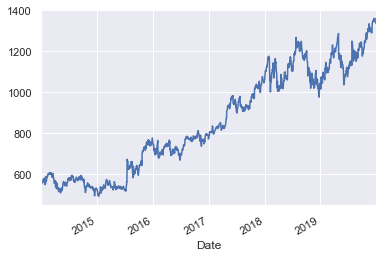

In [120]:
# plot data
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();

### Resampling and converting frequencies

resampling at higher or lower frequency, can use: 
* resample()
* asfreq()

The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

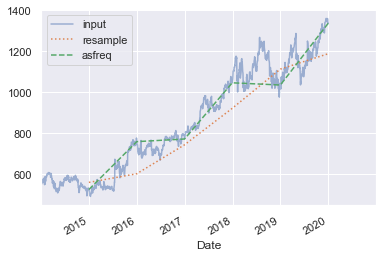

In [125]:
goog.plot(alpha = 0.5, style = '-')
goog.resample('BA').mean().plot(style = ':')
goog.asfreq('BA').plot(style = '--')
plt.legend(['input','resample','asfreq']);

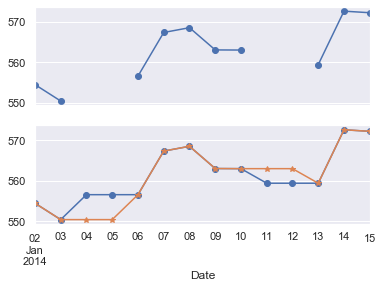

In [135]:
# asfreq() accepts a method argument to specify how values are imputed
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax = ax[0], marker = 'o')

data.asfreq('D', method = 'bfill').plot(ax = ax[1], marker = 'o')
data.asfreq('D', method = 'ffill').plot(ax = ax[1], marker = '*')

### Time-shifts
shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index

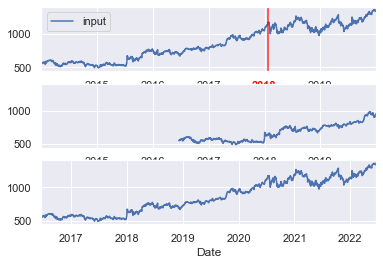

In [150]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2018-1-25')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.8, color='red')

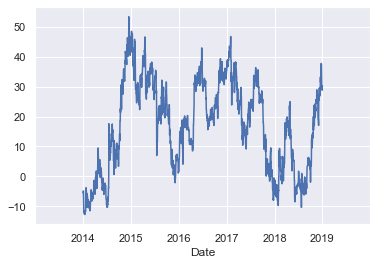

In [146]:
ROI = (goog.tshift(-365)/goog -1)*100
ROI.plot()

### Rolling Window


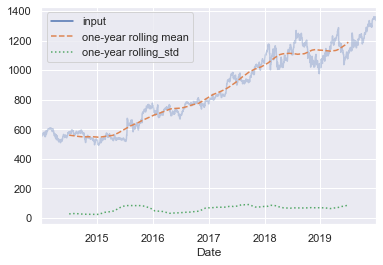

In [151]:
rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# High-Performance Pandas: eval() and query()
## Motivating Query() and eval(): Compoud Expression 
eval(), accelarate the string computaion in Dataframe
* pd.eval() support all all arithmetic operators
* pd.eval() supports the & and | bitwise operators
* pd.eval() supports the use of the literal and and or in Boolean expressions
* pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax
* function calls, conditional statements, loops, and other more involved constructs are currently not implemented in pd.eval()

In [152]:
import pandas as pd
import numpy as np
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2,df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                    for i in range(4))

In [153]:
%timeit df1+df2+df3+df4

62.1 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [154]:
%timeit pd.eval('df1+df2+df3+df4')

31.1 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
df1, df2, df3, df4, df5 = (pd.DataFrame(
    rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

%timeit result1 = -df1 * df2 / (df3+df4) -df5
%timeit result2 = pd.eval('-df1 * df2 / (df3+df4) -df5')

2.62 ms ± 73.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.25 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [157]:
# comparing the pd.eval() in object attributes
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

## DataFrame.eval() for Column-Wise Operations

In [164]:
df = pd.DataFrame(rng.rand(1000,3), columns = ['A','B','C'])

# compute at top level 
result1 = (df['A']+df['B'])/(df['C']-1)
result2 = pd.eval("(df.A+df.B)/(df.C-1)")
np.allclose(result1, result2)

True

### Assignment in DataFrame.eval()

In [165]:
# assign new columns
df.eval('D = (A+B)/C', inplace = True)
df.head()

,A,B,C,D
0,0.638465,0.017356,0.024395,26.883484
1,0.421487,0.961065,0.376686,3.670305
2,0.147944,0.283376,0.434088,0.993623
3,0.873774,0.363485,0.869978,1.422174
4,0.191600,0.132746,0.934659,0.347020


In [167]:
# modify existing columns
df.eval('D = (A-B)/C', inplace = True)
df.head()

,A,B,C,D
0,0.638465,0.017356,0.024395,25.460566
1,0.421487,0.961065,0.376686,-1.432433
2,0.147944,0.283376,0.434088,-0.311992
3,0.873774,0.363485,0.869978,0.586554
4,0.191600,0.132746,0.934659,0.062969


### Local variables in DataFrame.eval()
@ character marks a variable name rather than a column name, and lets you efficiently evaluate expressions involving the two "namespaces".

@ character is only supported by the DataFrame.eval() method, not by the pandas.eval() function,

In [171]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 =df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query() Method
DaraFrame.query() is another way to deal with string in dataframe
* expression involving columns of the DataFrame. It cannot be expressed using the DataFrame.eval() syntax, however! Instead, for this type of filtering operation, you can use the query() method:
* also accepts the @ flag to mark local variables

In [173]:
Cmean = df['C'].mean()
%timeit result1 = df[(df.A < Cmean)&(df.B < Cmean)]
%timeit result2 = df.query('A < @Cmean and B < @Cmean' )

828 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.63 ms ± 97.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Performance: When to Use These Functions
* If the size of the temporary DataFrames is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an eval() or query() expression. 
